In [112]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer, util


In [113]:
df = pd.read_csv("egitim_verisi.csv") # burdan eğitim verisi değiştirilebilir
df.head()

,CategoryName,GeneralCategory
0,Alternatif Muzik,Music
1,Ascilik Ve Mutfak,Food & Drink
2,Bilim Teknoloji,Technology
3,Bilisim,Technology
4,Caz Muzik,Music


In [116]:
X = df["CategoryName"]
y = df["GeneralCategory"]

In [117]:
model = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens") # Çok dilli, BERT tabanlı. Daha büyük ve güçlü.
X_embed = model.encode(X.tolist())

X_train, X_test, y_train, y_test = train_test_split(X_embed, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_embed, y)

LogisticRegression(max_iter=1000, random_state=42)

In [118]:
y_pred = clf.predict(X_test)
y_pred

array(['Health & Wellness', 'Music', 'Art & Culture', 'Travel',
       'Art & Culture', 'Education', 'Technology', 'Music', 'Sports',
       'Health & Wellness', 'Travel', 'Music', 'Sports', 'Sports',
       'Education', 'Health & Wellness', 'Music', 'Sports',
       'Health & Wellness', 'Music', 'Education', 'Art & Culture',
       'Education', 'Music', 'Education', 'Food & Drink', 'Food & Drink',
       'Art & Culture', 'Health & Wellness', 'Other', 'Education',
       'Food & Drink', 'Sports', 'Sports', 'Health & Wellness',
       'Education', 'Health & Wellness', 'Art & Culture', 'Music',
       'Music', 'Health & Wellness', 'Music', 'Other', 'Other', 'Music',
       'Music', 'Travel', 'Other', 'Other', 'Art & Culture',
       'Art & Culture', 'Travel', 'Music', 'Art & Culture',
       'Art & Culture', 'Health & Wellness', 'Sports', 'Art & Culture',
       'Music', 'Travel', 'Technology', 'Music', 'Food & Drink', 'Music',
       'Music', 'Food & Drink', 'Travel', 'Education', 'Musi

In [119]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.95


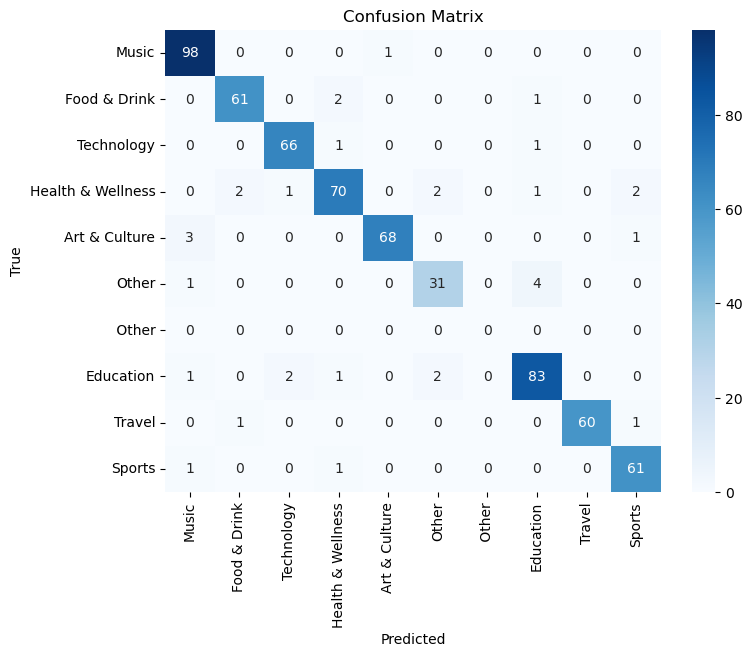

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=df["GeneralCategory"].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df["GeneralCategory"].unique(), yticklabels=df["GeneralCategory"].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [121]:
import joblib
joblib.dump(clf, "model.pkl")

['model.pkl']